<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

Пусть $X[t] = C$, т.е. просто константа. Базовые алгоритмы $X_n[t] = С + n \delta_\varepsilon, n \in \mathbb{N}$. Оптимальный - $n = 1$. Но модель может выбрать несколько базовых алгоритмов, кроме лучшего. Тогда $X_{\text{mixed}} > C + \delta = X_1[t] > C$.

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

Аналогично примеру из 1

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

Нет, неверно. если процесс детерменированный, то можно рассмотреть композицию точного алгоритма и алгоритма с добавлением случайного шума на каждом шаге к предыдущему значению (его точность будет падать от времени)

Так как контест еще не кончился, то отсылаю пока что решение на 5.39 MAPE, итоговый будет позже

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [206]:
from tqdm import tqdm
import os
import numpy as np
import math
import pandas as pd
import re

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
print(1)

1


In [208]:
import sklearn
sklearn.__version__

'0.19.0'

In [209]:

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    x = np.array(x)
    y = np.array(y)
    qlt = np.abs((x-y)/x)
    return qlt.mean() , np.abs(x-y)


def BuildForecast(h, ts, AlgName, AlgTitle, ParamsArray, step='D'):
	FRC_TS = dict()
	for p in ParamsArray:
		frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
		frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)
		
		for cntr in ts.columns:
			frc_ts[cntr] = eval(AlgName)(ts[cntr], h, p)
		
#         frc_ts.columns = frc_ts.columns+('%s %s' % (AlgTitle, p))
		FRC_TS['%s %s' % (AlgTitle, p)] = frc_ts
	return FRC_TS

def plotTSForecast(ts, frc_ts, ts_num=0, alg_title=''):
	frc_ts.columns = ts.columns+'; '+alg_title
	ts[ts.columns[0]].plot(style='b', linewidth=1.0, marker='o')
	ax = frc_ts[frc_ts.columns[0]].plot(style='r-^', figsize=(15,5), linewidth=1.0)
	plt.xlabel('Time ticks')
	plt.ylabel('TS values')
	plt.legend()
	return ax
	
def InitExponentialSmoothing(x, h, Params):

    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST	

In [214]:
def fix_time(data):
    times = [np.flip(x.split('.'),axis=0)  for x in data['Date']]
    times = [[int(x) for x in d] for d in times]
    times = [datetime(x[0], x[1], x[2]) for x in times]
    data['Date'] = times
    return data

data = pd.DataFrame.from_csv('train.csv.xls')

tss = {}
data = fix_time(data)
for tsid in set(data['tsID']):
    tss[tsid] = data[data['tsID'] == tsid]

10 30
11 30


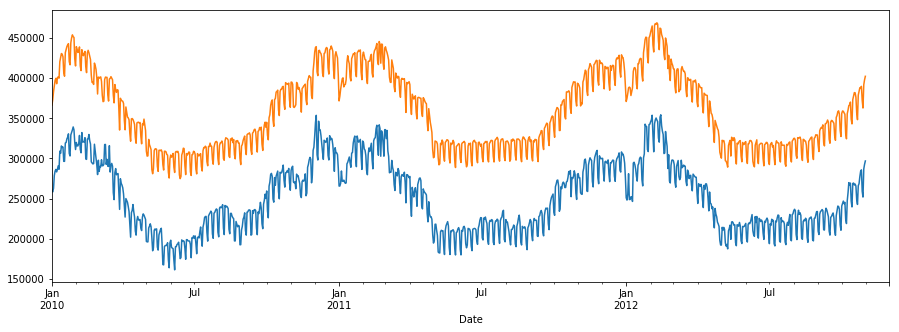

In [6]:
for t in [10,11]:
    s = pd.Series(tss[t]['ACTUAL'])
    s.index = tss[t]['Date']
#     print(s[-60:])
    s.plot(figsize=(15,5))
    sumnans = np.sum(np.isnan(s))
    print(t, sumnans)

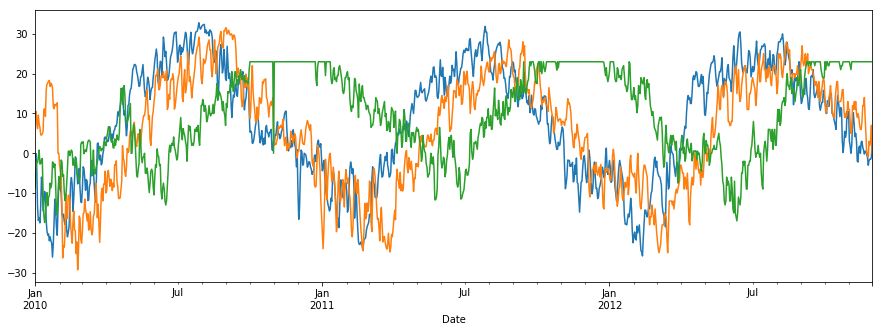

In [7]:
for t in [4,5,6]:
    s = pd.Series(tss[t]['Temp'])
    s.index = tss[t]['Date']
    s.plot(figsize=(15,5))

In [8]:
example_sub = pd.DataFrame.from_csv('SubmissionSample.csv.xls')

In [9]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        return FORECAST
    
    if gamma>1:
        w.warn('Gamma can not be more than 1')
        return FORECAST
    if gamma<0:
        w.warn('Gamma can not be less than 0')
        return FORECAST
    
    l= np.NaN  # initialize ts level 
    s= [np.NaN] * p  # initalize seasonality values (it must be vector of lenth p)
    
    for t in range(T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l = x[t]
 
            if math.isnan(s[t % p]):
                s[t % p] = 0 
            
            l_prev = l
     
            l = alpha * (x[t] - s[t % p]) + (1 - alpha) * l_prev  # recurrent smoothing of level
            s[t % p] = gamma * (x[t] - l_prev) + (1 - gamma) * s[t % p] # recurrent smoothing of seasonality
            
            
        FORECAST[t + h] = l + s[(t + h) % p]
    return FORECAST

In [10]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def WinterstwoExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p1 = Params['seasonality_period_1']
    p2 = Params['seasonality_period_2']
    
    FORECAST = [np.NaN] * (T + h)
    
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        return FORECAST
    
    if beta>1:
        w.warn('Beta can not be more than 1')
        return FORECAST
    if beta<0:
        w.warn('Beta can not be less than 0')
        return FORECAST
    
    if gamma>1:
        w.warn('Gamma can not be more than 1')
        return FORECAST
    if gamma<0:
        w.warn('Gamma can not be less than 0')
        return FORECAST
    
    l= np.NaN  # initialize ts level 
    s1= [np.NaN] * p1  # initalize seasonality values (it must be vector of lenth p)
    s2= [np.NaN] * p2  # initalize seasonality values (it must be vector of lenth p)
    
    for t in range(T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l = x[t]
 
            if math.isnan(s1[t % p1]):
                s1[t % p1] = 0 
            
            if math.isnan(s2[t % p2]):
                s2[t % p2] = 0 
            
            l_prev = l
            s1_prev = s1[t % p1]
            s2_prev = s2[t % p2]
     
            l = alpha * (x[t] - s1_prev - s2_prev) + (1 - alpha) * l_prev  # recurrent smoothing of level
            s1[t % p1] = beta * (x[t] - l_prev - s2_prev) + (1 - beta) * s1_prev # recurrent smoothing of seasonality
            s2[t % p2] = gamma * (x[t] - l_prev - s1_prev) + (1 - gamma) * s2_prev # recurrent smoothing of seasonality
            
            
        FORECAST[t + h] = l + s1[(t + h) % p1] + s2[(t + h) % p2]
    return FORECAST

In [ ]:
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

In [11]:
# Start with this code
###################### Theil-Wage Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    beta <scalar in [0,1]> -  trend smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter 

def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        return FORECAST
    
    if beta>1:
        w.warn('Beta can not be more than 1')
        return FORECAST
    if beta<0:
        w.warn('Beta can not be less than 0')
        return FORECAST
    
    if gamma>1:
        w.warn('Gamma can not be more than 1')
        return FORECAST
    if gamma<0:
        w.warn('Gamma can not be less than 0')
        return FORECAST
    
    
    l = np.NaN  # initialize ts level 
    b = np.NaN  # initialize trend 
    s = [np.NaN] * p  # initalize seasonality values (it must be vector of lenth p)
    
    x = np.array(x)
    
    for t in range(T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l = x[t]
                
            if math.isnan(b):
                b = 0
 
            if math.isnan(s[t % p]):
                s[t % p] = 0
            
            l_prev = l
            b_prev = b
     
            l = alpha * (x[t] - s[t % p]) + (1 - alpha) * (l_prev + b_prev)   # recurrent smoothing of level
            b = beta * (l - l_prev) + (1 - beta) * b_prev  # recurrent smoothing of trend
            s[t % p] = gamma * (x[t] - l) + (1 - gamma) * s[t % p] # recurrent smoothing of seasonality
            
        FORECAST[t + h] = l + h * b + s[(t + h) % p]
    return FORECAST

In [13]:
from sklearn.linear_model import LinearRegression

In [12]:
def find_opt(ts, tsid, algname, algtitle, ESParamsArray):
    lenn = len(ts)
    test = 30
    train = (lenn - 30) // 5 * 4
    val = lenn - 30 - train
    adapt = 400
#     print(ts.index)
    itrainval = ts[:-test].index
#     print(itrainval)
    FRC_WAGE = BuildForecast(h=30, ts=ts.loc[itrainval], 
                            AlgName=algname,
                            AlgTitle=algtitle,
                            ParamsArray = ESParamsArray,
                            step='D',
                            )

    # compare ES parameters
    QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_WAGE.keys())

    itrain = ts[adapt:train].index
    
    for param_cntr in sorted(QualityStr.columns):
        frc_wage = FRC_WAGE[param_cntr]
#         print(frc_wage.index)
#         print(ts.loc[itrain], frc_wage.loc[itrain])
        QualityStr[param_cntr],_ = qualityMAPE(ts.loc[itrain], frc_wage.loc[itrain])
#         print(param_cntr, frc_wage)
        
    algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]

#     print(FRC_WAGE[algName].index)
#     print(tsid)
#     print(QualityStr[QualityStr.columns].mean().sort_values()[:10])
#     print('best val quality: {}'.format(qualityMAPE(ts.loc[itrain], FRC_WAGE[algName].loc[itrain])[0]))
    ival = ts[train:train + val].index
    return qualityMAPE(ts.loc[ival], FRC_WAGE[algName].loc[ival])[0], algName

In [28]:
store = dict()

In [154]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import scipy.stats as sps
from catboost import CatBoostRegressor
from sklearn.svm import SVR

In [167]:
def sin_from_T(T):
    return lambda x: np.sin(2 * np.pi * x / T)

def cos_from_T(T):
    return lambda x: np.cos(2 * np.pi * x / T)

def get_features(frame):
    Ts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 28, 29, 30, 31, 32, 180, 181, 182, 364, 365, 366]
    Sins = [sin_from_T(t) for t in Ts]
    Coss = [cos_from_T(t) for t in Ts]
    Dates = frame['Date']
    Time = np.array([x.year + x.month + x.day for x in Dates])
    features_sin = np.array([f(Time) for f in Sins]).T
    features_cos = np.array([f(Time) for f in Coss]).T
    r = lambda x: np.array(x).reshape(-1,1)
    s = lambda x: np.array(x).shape
    Features = np.concatenate((r(frame['ACTUAL']), r(Time), r(frame['Temp']), features_sin, features_cos), axis=1)
#     print(Features.shape)
    return pd.DataFrame(Features, index = frame.index)

def val_fourier(frame):
    lenn = len(frame)
    test = 30
    train = (lenn - test) // 5 * 4
    val = lenn - test - train
    iXtrain = frame[:train].index
    iYtrain = frame[30:train + 30].index
    iXval = frame[train:train + val - 30].index
    iYval = frame[train + 30:train + val].index
    X_train = get_features(frame.loc[iXtrain])
    Y_train = frame['ACTUAL'].loc[iYtrain]
#     print(frame.loc[iXval])
    X_val = get_features(frame.loc[iXval])
    Y_val = frame['ACTUAL'].loc[iYval]
#     for i in np.arange(X_val.shape[0]):
#         if np.any(np.isnan(X_val.iloc[[i]])):
#             print(X_val.iloc[[i]], i, X_val.iloc[[i]].index)
    model = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=3,coef0=1))
#     X_train += sps.norm.rvs(size=X_train.shape)
#     X_val += sps.norm.rvs(size=X_val.shape)
#     print(frame['tsID'], np.max(np.abs(np.array(X_train))), np.sum(np.isnan(np.array(X_train))), 
#           np.sum(np.isnan(np.array(X_val))))
    model.fit(X_train, Y_train)
#     print(X_val.shape,Y_val.shape)
#     print(X_val)
    y_pred = model.predict(X_val)
    return qualityMAPE(Y_val, y_pred)[0]

In [170]:
%%time
loss = []
alg = []

ALPHA = np.linspace(0,1,2)
GAMMA = np.linspace(0,1,2)
ESParamsArray1 = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':365} 
                    for alpha in ALPHA for gamma in GAMMA]
ESParamsArray2 = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':7} 
                    for alpha in ALPHA for gamma in GAMMA]

ESParamsArray3 = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':30} 
                    for alpha in ALPHA for gamma in GAMMA]


for t in tqdm(tss, position=0):
    s = pd.DataFrame(tss[t]['ACTUAL'])
    s.index = tss[t]['Date']
    _loss1, _alg1 = find_opt(s,
                            t, 
                            'WintersExponentialSmoothing', 
                            'WintersAdditiveES',
                            ESParamsArray1,
                          )
    
#     _loss2, _alg2 = find_opt(s,
#                         t, 
#                         'WintersExponentialSmoothing', 
#                         'WintersAdditiveES',
#                         ESParamsArray2,
#                       )
        
#     _loss3, _alg3 = find_opt(s,
#                     t, 
#                     'WintersExponentialSmoothing', 
#                     'WintersAdditiveES',
#                     ESParamsArray3,
#                   )
    _loss = np.min([_loss1])
    _alg = np.array([_alg1])[np.argmin([_loss1])]
    
    q = val_fourier(pd.DataFrame(tss[t]))
    if q < _loss:
        _loss = q
        _alg = "Fourier"
    loss.append(_loss)
    alg.append(_alg)
print(np.mean(loss))
store['WintersExponentialSmoothing'] = [loss, alg]

100%|██████████| 22/22 [00:07<00:00,  4.10it/s]

0.0523319699804
CPU times: user 6.95 s, sys: 101 ms, total: 7.05 s
Wall time: 7.29 s


In [171]:
store['WintersExponentialSmoothing']

[[0.065829569663272594,
  0.033280002103562648,
  0.036508694005232128,
  0.063474305094752659,
  0.044801825948783437,
  0.083421315967154783,
  0.070332409480266048,
  0.065709405186063732,
  0.037623382741406322,
  0.056771406070809681,
  0.029779763543713301,
  0.041858261535571539,
  0.053853684867603821,
  0.030518644242993394,
  0.052905195988712288,
  0.057138833572845042,
  0.064688781761422884,
  0.054393997360313799,
  0.075355741518868286,
  0.048099063549911211,
  0.053072936911585149,
  0.031886118453845515],
 ["WintersAdditiveES {'alpha': 0.0, 'gamma': 1.0, 'seasonality_period': 365}",
  'Fourier',
  "WintersAdditiveES {'alpha': 1.0, 'gamma': 0.0, 'seasonality_period': 365}",
  "WintersAdditiveES {'alpha': 0.0, 'gamma': 1.0, 'seasonality_period': 365}",
  "WintersAdditiveES {'alpha': 0.0, 'gamma': 1.0, 'seasonality_period': 365}",
  "WintersAdditiveES {'alpha': 0.0, 'gamma': 1.0, 'seasonality_period': 365}",
  "WintersAdditiveES {'alpha': 0.0, 'gamma': 1.0, 'seasonality_

In [198]:
%%time
loss = []
alg = []

ALPHA = np.linspace(0,1,11)
BETA =  np.linspace(0,1,11)
GAMMA = np.linspace(0,1,11)
ESParamsArray = [{'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period_1':365, 'seasonality_period_2':7}
                 for alpha in ALPHA
                    for beta in BETA
                    for gamma in GAMMA]

for t in tqdm(tss, position=0):
    s = pd.DataFrame(tss[t]['ACTUAL'])
    s.index = tss[t]['Date']
    _loss, _alg = find_opt( s, 
                            t, 
                            'WinterstwoExponentialSmoothing',
                            'Winter2AdditiveES', 
                            ESParamsArray,
                          )
    loss.append(_loss)
    alg.append(_alg)
print(np.mean(loss))
store['WinterstwoExponentialSmoothing'] = [loss, alg]

100%|██████████| 22/22 [36:12<00:00, 90.42s/it] 

0.0550649147826
CPU times: user 35min 29s, sys: 12.3 s, total: 35min 41s
Wall time: 36min 12s


In [190]:
%%time
loss = []
alg = []

ALPHA = np.linspace(0,1,21)
BETA =  np.linspace(0,1,21)
GAMMA = np.linspace(0,1,21)
ESParamsArray = [{'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':365}
                 for alpha in ALPHA
                    for beta in BETA
                    for gamma in GAMMA]

for t in tqdm(tss, position=0):
    s = pd.DataFrame(tss[t]['ACTUAL'])
    s.index = tss[t]['Date']
    _loss, _alg = find_opt( s, 
                            t, 
                            'TheilWageExponentialSmoothing',
                            'TheilAdditiveES', 
                            ESParamsArray,
                          )
    loss.append(_loss)
    alg.append(_alg)
print(np.mean(loss))
store['TheilWageExponentialSmoothing'] = [loss, alg]

100%|██████████| 22/22 [22:39<00:00, 58.95s/it]

0.054660023744
CPU times: user 21min 25s, sys: 22.8 s, total: 21min 48s
Wall time: 22min 39s


In [174]:
def get_params(s):
    s = re.split( '[ $:,\']+', s)
    numbs = []
    for c in s:
        try:
            c = float(c)
            numbs.append(c)
        except:
            pass
    return numbs

In [182]:
def predict_with_alg(ts, tsid, algname, algtitle, ESParamsArray):
    lenn = len(ts)
    train = lenn - 30
    adapt=500
    test = 30
    itrain = ts[:-test].index
    FRC_WAGE = BuildForecast(h=30, ts=ts.loc[itrain], 
                            AlgName=algname,
                            AlgTitle=algtitle,
                            ParamsArray = ESParamsArray,
                            step='D',
                            )

    # compare ES parameters
    QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_WAGE.keys())
    
    itraincomp = ts[adapt:-test].index
    for param_cntr in sorted(QualityStr.columns):
        frc_wage = FRC_WAGE[param_cntr]
        QualityStr[param_cntr],_ = qualityMAPE(ts.loc[itraincomp], frc_wage.loc[itraincomp])
        
    algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]

#     print(tsid)
#     print(QualityStr[QualityStr.columns].mean().sort_values()[:5])
#     print('best val quality: {}'.format(qualityMAPE(ts.loc[itraincomp], FRC_WAGE[algName].loc[itraincomp])[0]))
    resind = FRC_WAGE[algName].index[train:train + test]
    return FRC_WAGE[algName].loc[resind], qualityMAPE(ts.loc[itraincomp], FRC_WAGE[algName].loc[itraincomp])[0]

In [220]:
def predict_fourier(frame):
    lenn = len(frame)
    test = 30
    train = lenn - test
    iXtrain = frame[:train - 30].index
    iYtrain = frame[30:train].index
    iXval = frame[train-30:train].index
    iYval = frame[train:train + 30].index
    X_train = get_features(frame.loc[iXtrain])
#     print(frame.index)
#     print(frame['ACTUAL'].index, iYtrain)
    Y_train = frame['ACTUAL'].loc[iYtrain]
#     print(frame.loc[iXval])
    X_val = get_features(frame.loc[iXval])
    model = make_pipeline(StandardScaler(),  SVR(kernel='poly', degree=3,coef0=1))
    model.fit(X_train, Y_train)
#     print(X_val.shape,Y_val.shape)
#     print(X_val)
    y_pred = model.predict(X_val)
    y_pred_train = model.predict(X_train)
    return y_pred, qualityMAPE(Y_train, y_pred_train)[0]

In [221]:
%%time
frame = []
ALPHA = np.linspace(0,1,21)
GAMMA = np.linspace(0,1,21)
ESParamsArray1 = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':365} 
                    for alpha in ALPHA for gamma in GAMMA]
ESParamsArray2 = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':7} 
                    for alpha in ALPHA for gamma in GAMMA]
ESParamsArray3 = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':30} 
                    for alpha in ALPHA for gamma in GAMMA]

for t in tqdm(tss, position=0):
    alg4, loss4 = predict_fourier(tss[t])
    s = pd.DataFrame(tss[t]['ACTUAL'])
    s.index = tss[t]['Date']
    alg1, loss1  = predict_with_alg(s,
                                        t, 
                                        'WintersExponentialSmoothing', 
                                        'WintersAdditiveES',
                                        ESParamsArray1,
                          )
    alg2, loss2  = predict_with_alg(s,
                                        t, 
                                        'WintersExponentialSmoothing', 
                                        'WintersAdditiveES',
                                        ESParamsArray2,
                          )
    alg3, loss3  = predict_with_alg(s,
                                        t, 
                                        'WintersExponentialSmoothing', 
                                        'WintersAdditiveES',
                                        ESParamsArray3,
                          )
    losses = [loss1, loss2, loss3, loss4]
    algs = [alg1,alg2, alg3, alg4]
    loss = np.min(losses)
    _frame = algs[np.argmin(losses)]
    frame.append(_frame)

100%|██████████| 22/22 [26:26<00:00, 61.29s/it]

CPU times: user 25min 57s, sys: 7.77 s, total: 26min 5s
Wall time: 26min 26s


In [216]:
for t in tss:
    print(tss[t]['ACTUAL'].index)

Int64Index([15672, 15673, 15674, 15675, 15676, 15677, 15678, 15679, 15680,
            15681,
            ...
            16727, 16728, 16729, 16730, 16731, 16732, 16733, 16734, 16735,
            16736],
           dtype='int64', name='ID', length=1065)
Int64Index([17631, 17632, 17633, 17634, 17635, 17636, 17637, 17638, 17639,
            17640,
            ...
            18686, 18687, 18688, 18689, 18690, 18691, 18692, 18693, 18694,
            18695],
           dtype='int64', name='ID', length=1065)
Int64Index([19590, 19591, 19592, 19593, 19594, 19595, 19596, 19597, 19598,
            19599,
            ...
            20645, 20646, 20647, 20648, 20649, 20650, 20651, 20652, 20653,
            20654],
           dtype='int64', name='ID', length=1065)
Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065],
           dtype='int64', name='ID', length=1065)
Int64Index([1960, 1961, 

In [222]:
i = 0
res = pd.DataFrame()
for ts in frame:
    print(ts[-30:])
    res.append(ts[-30:])

               ACTUAL
2012-11-01  102446.64
2012-11-02  101958.39
2012-11-03   93883.23
2012-11-04   93866.22
2012-11-05   93260.16
2012-11-06  102008.97
2012-11-07  105698.52
2012-11-08  108383.40
2012-11-09  107925.66
2012-11-10  107746.47
2012-11-11   99828.63
2012-11-12   97780.59
2012-11-13  105160.23
2012-11-14  108486.81
2012-11-15  107789.94
2012-11-16  108967.95
2012-11-17  108497.43
2012-11-18  101675.52
2012-11-19   97286.94
2012-11-20  107497.35
2012-11-21  109474.02
2012-11-22  110471.31
2012-11-23  111692.34
2012-11-24  111290.40
2012-11-25  103310.37
2012-11-26   99521.91
2012-11-27  109413.36
2012-11-28  111830.49
2012-11-29  110907.54
2012-11-30  111772.35
                   ACTUAL
2012-11-01  368059.335928
2012-11-02  374171.538139
2012-11-03  368851.908917
2012-11-04  368208.834578
2012-11-05  379883.951120
2012-11-06  380889.802659
2012-11-07  381239.255364
2012-11-08  377994.967767
2012-11-09  377803.054396
2012-11-10  365994.093630
2012-11-11  358063.375238
2012-1

In [349]:
np.array(frame[0].index)

numpy.datetime64('2013-01-01T00:00:00.000000000')

In [141]:
np.unique(data['tsID'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [223]:
def make_res_frame(tss, frame):
    res = pd.DataFrame(columns=['ACTUAL'])
    for t,f in zip(tss, frame):
        f.index = tss[t].index[-30:]
#         print(res)
#         print(f)
        res = res.append(f)
    return res

In [224]:
res = make_res_frame(tss, frame)

In [225]:
def save(frame, name):
    frame.columns = ['PREDICTED']
    frame.index.name = 'ID'
    frame.to_csv(name)

In [226]:
save(res, 'mixed1')

In [208]:
res

,PREDICTED
ID,
16707,101841.7325
16708,94000.0050
16709,94092.4400
16710,93339.0425
16711,103158.9550
16712,106405.6750
16713,108948.5400
16714,108402.7175
16715,108257.0825


In [186]:
res.index.name = 'ID'

In [187]:
res

,PREDICTED
ID,
16707,102446.64
16708,101958.39
16709,93883.23
16710,93866.22
16711,93260.16
16712,102008.97
16713,105698.52
16714,108383.40
16715,107925.66


In [16]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

/Users/sergmiller/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module '_catboost' does not match runtime version 3.6
  return f(*args, **kwds)


In [17]:
def get_delta(frame):
    frame = frame.drop(['Date'],axis=1)
    last = int( frame['ACTUAL'].iloc[[-1]])
#     print(last)
#     print(frame['ACTUAL'])
    frame['ACTUAL'] = np.subtract(frame['ACTUAL'], frame['ACTUAL'].iloc[[-1]])
#     print(frame['ACTUAL'])
    return np.array(frame).reshape(-1), last

  0%|          | 0/22 [00:00<?, ?it/s]

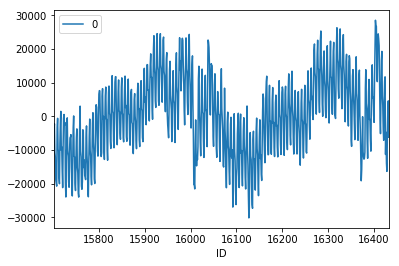

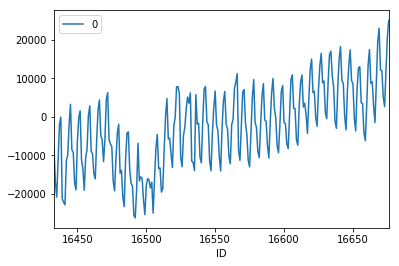

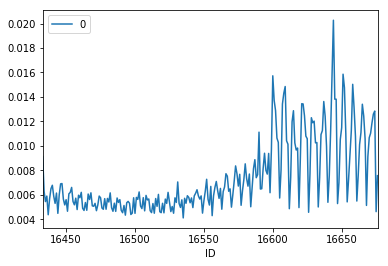

  5%|▍         | 1/22 [00:10<03:46, 10.80s/it]

1.00000093934
3.86683664429
Training has stopped (degenerate solution on iteration 1, probably too small l2-regularization, try to increase it)


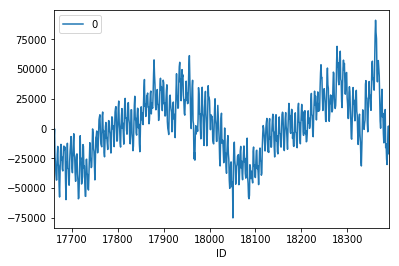

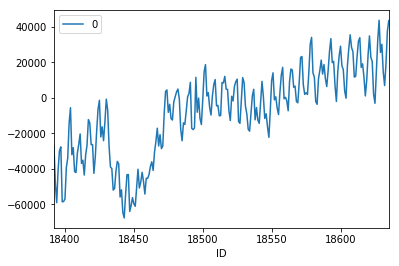

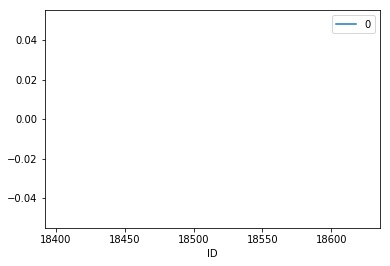

  9%|▉         | 2/22 [00:13<02:49,  8.46s/it]

inf
inf


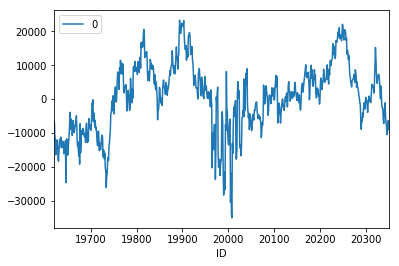

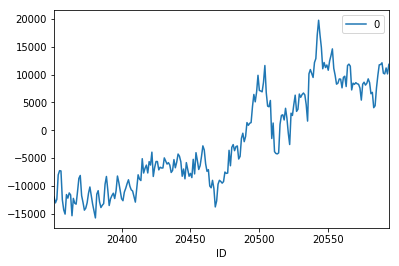

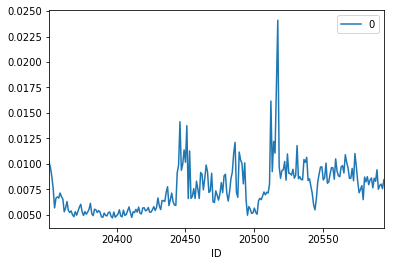

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
 14%|█▎        | 3/22 [00:23<02:46,  8.77s/it]

1.00000021113
inf


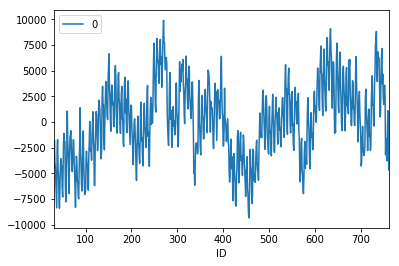

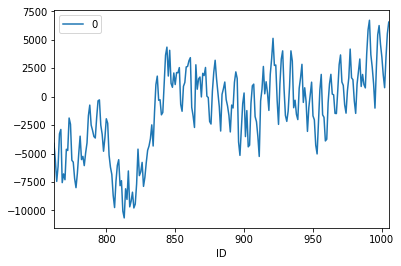

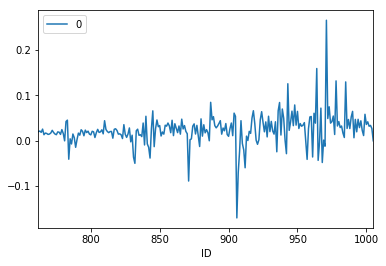

 18%|█▊        | 4/22 [00:35<02:53,  9.66s/it]

1.00000107854
5.43974183574


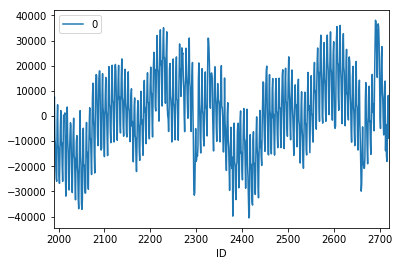

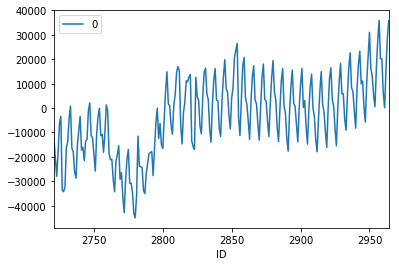

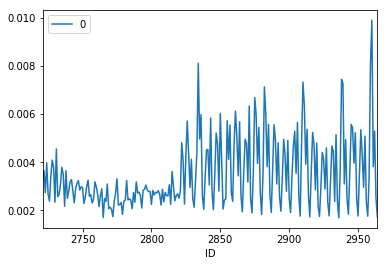

 23%|██▎       | 5/22 [00:44<02:43,  9.59s/it]

1.00000175796
12.6795731307


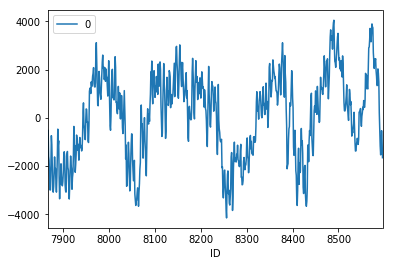

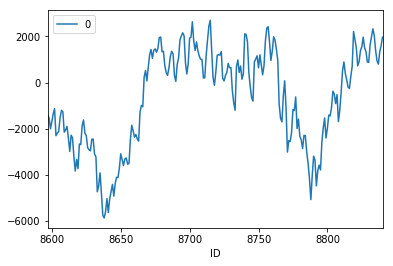

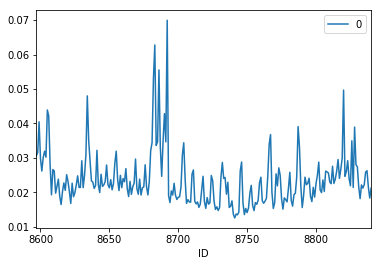

 27%|██▋       | 6/22 [00:52<02:27,  9.20s/it]

0.999987456474
4.52635053174


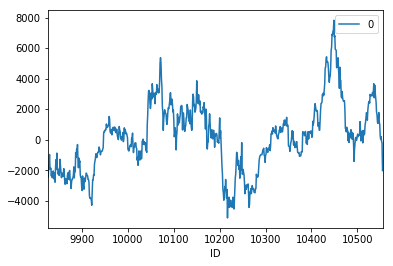

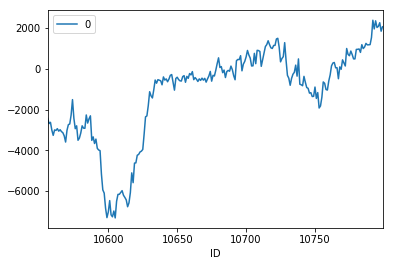

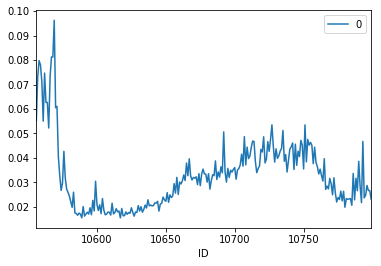

 32%|███▏      | 7/22 [01:00<02:13,  8.88s/it]

1.00001599135
3.11124766848


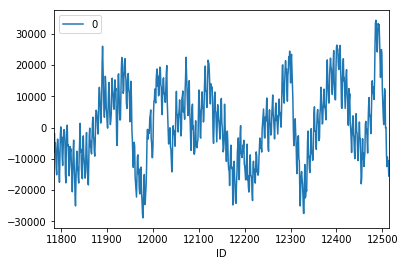

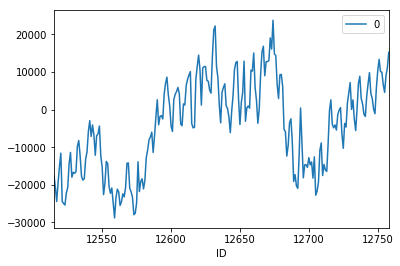

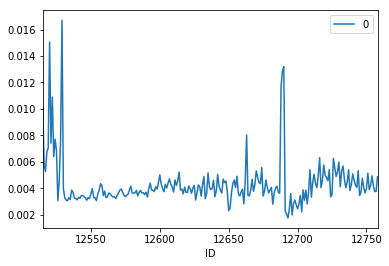

 36%|███▋      | 8/22 [01:09<02:01,  8.67s/it]

0.999999403595
4.08570724863


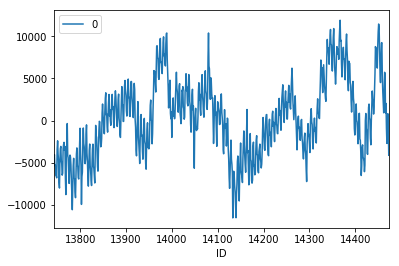

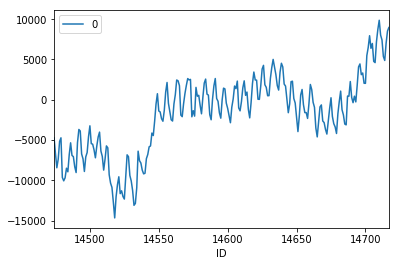

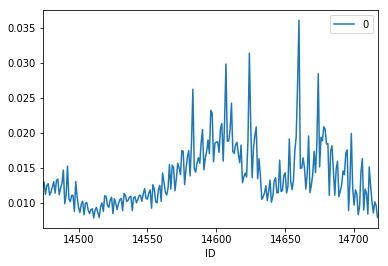

 41%|████      | 9/22 [01:17<01:52,  8.63s/it]

1.00000072265
3.45097094023


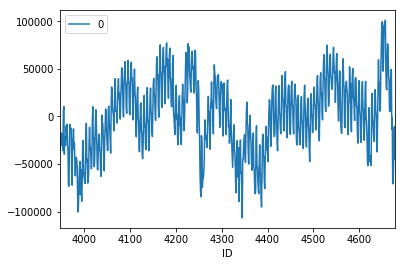

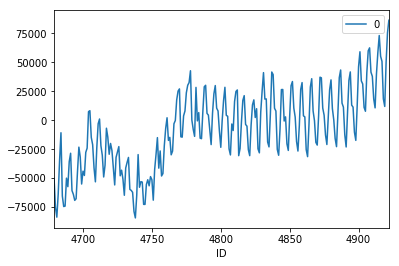

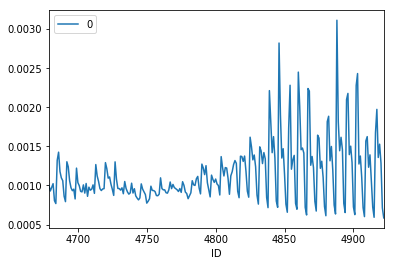

 45%|████▌     | 10/22 [01:30<01:58,  9.89s/it]

0.999999983809
3.77175956763


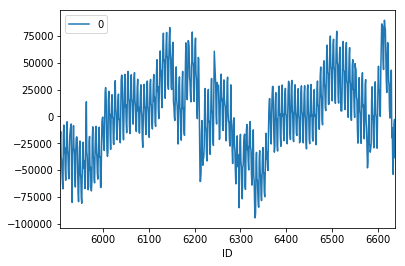

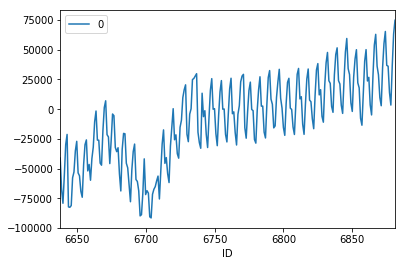

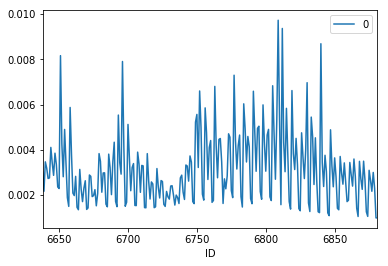

 50%|█████     | 11/22 [01:41<01:54, 10.38s/it]

1.00000142389
6.6833672996


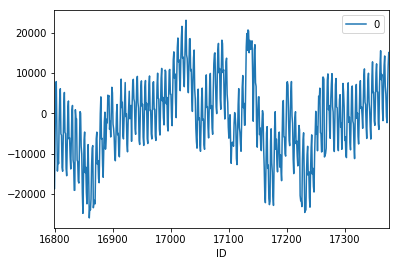

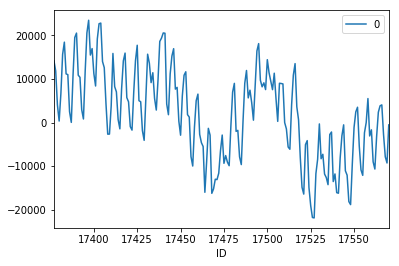

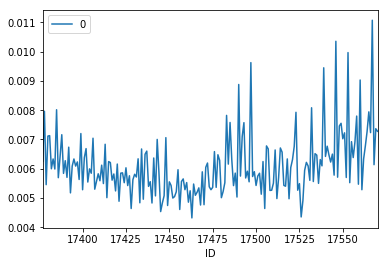

 55%|█████▍    | 12/22 [01:49<01:36,  9.68s/it]

0.999986536935
2.84317712136


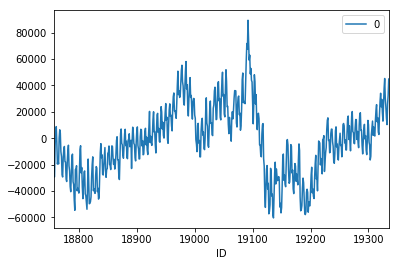

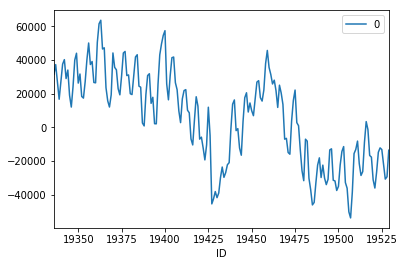

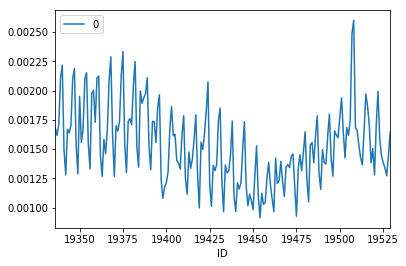

 59%|█████▉    | 13/22 [01:58<01:24,  9.36s/it]

0.999999986511
1.85814025117


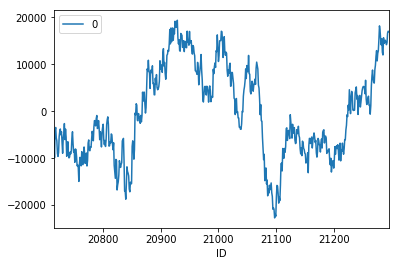

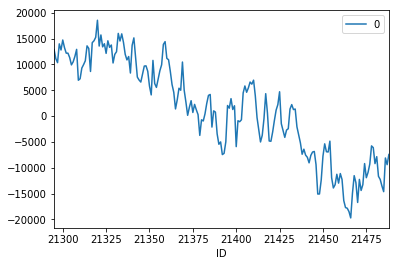

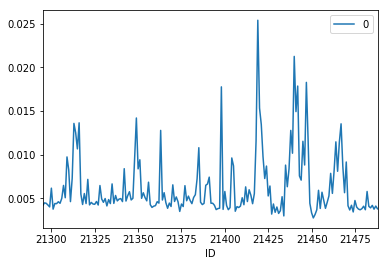

 64%|██████▎   | 14/22 [02:07<01:12,  9.12s/it]

0.999999520428
2.26039385348


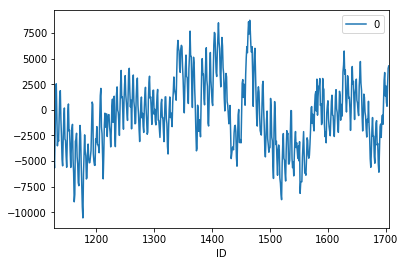

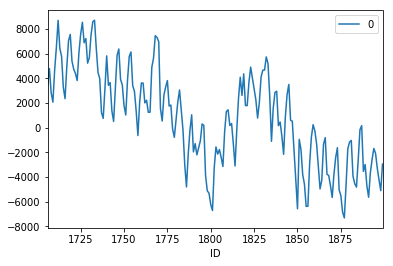

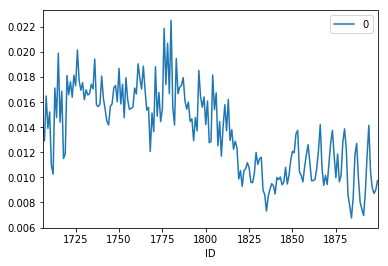

 68%|██████▊   | 15/22 [02:15<01:02,  8.97s/it]

0.999999317553
6.21696909762


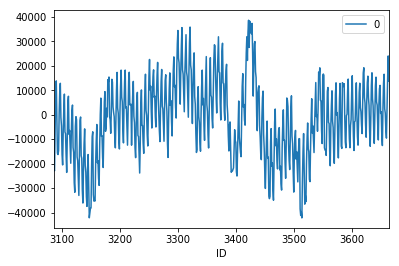

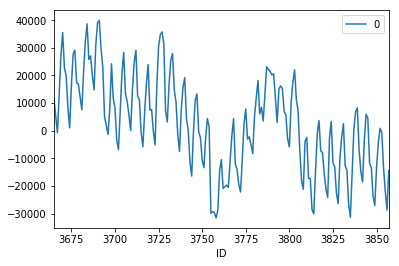

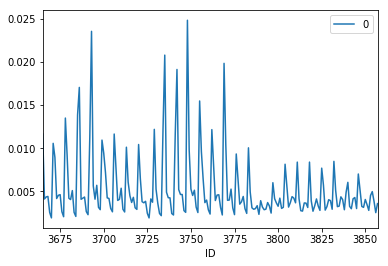

 73%|███████▎  | 16/22 [02:27<00:58,  9.72s/it]

0.999999757446
4.73327013282


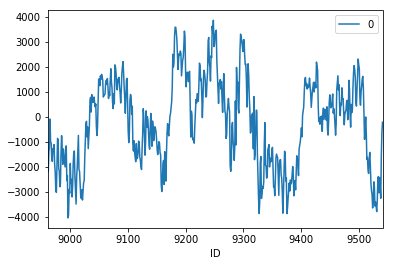

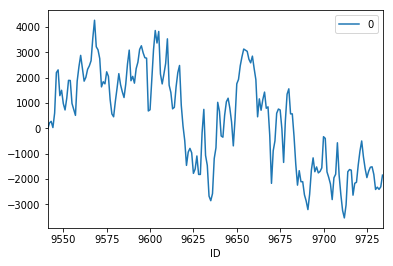

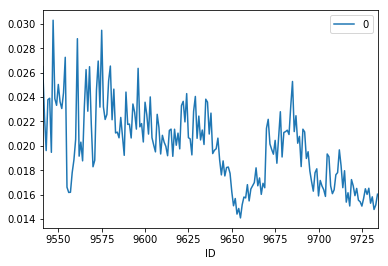

 77%|███████▋  | 17/22 [02:36<00:47,  9.55s/it]

0.99999892765
1.81605283039


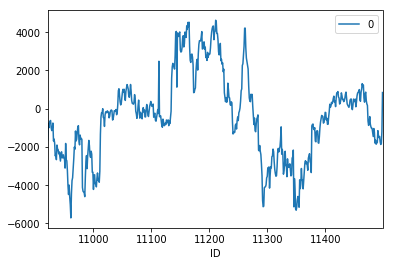

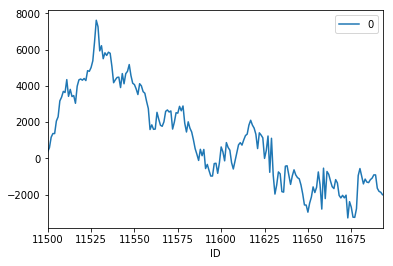

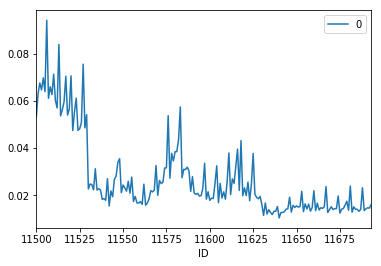

 82%|████████▏ | 18/22 [02:44<00:36,  9.23s/it]

1.0000312578
1.839397967


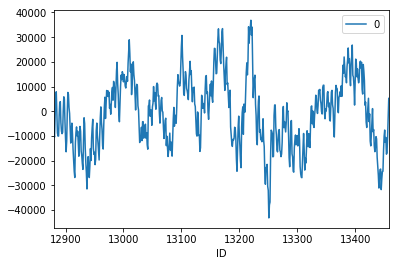

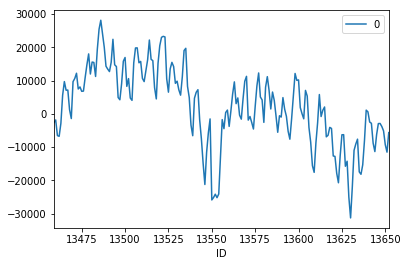

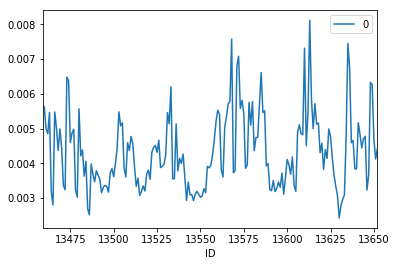

 86%|████████▋ | 19/22 [02:53<00:27,  9.04s/it]

0.999999719518
4.30144306701


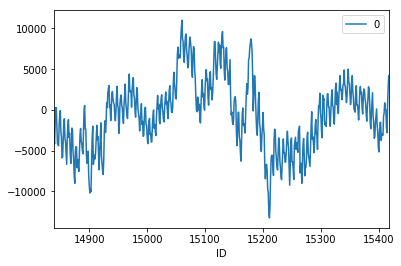

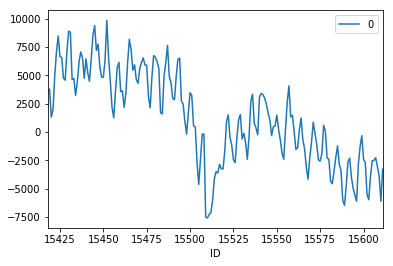

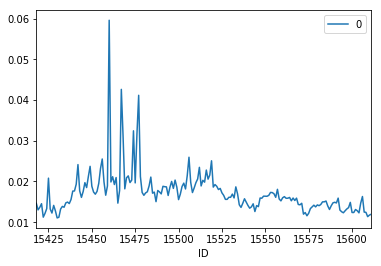

 91%|█████████ | 20/22 [03:02<00:17,  9.00s/it]

0.999993965894
13.6849955784


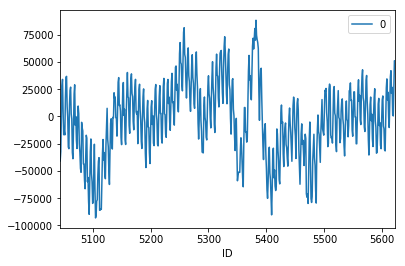

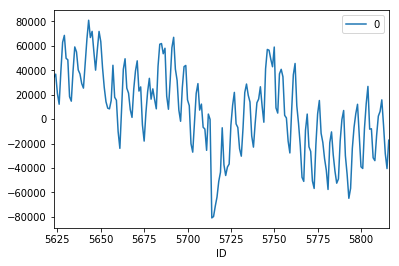

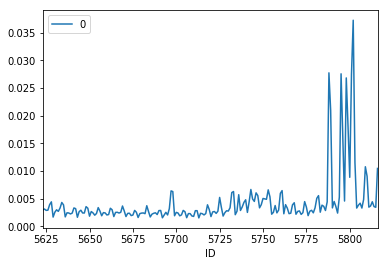

 95%|█████████▌| 21/22 [03:10<00:08,  8.86s/it]

1.00000012253
2.97225345146


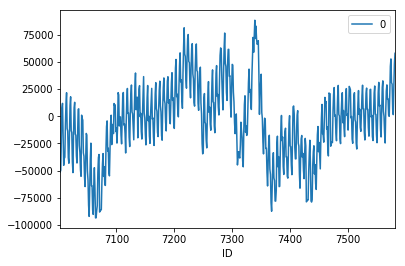

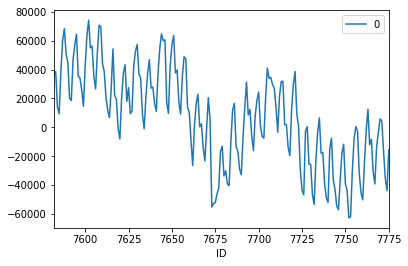

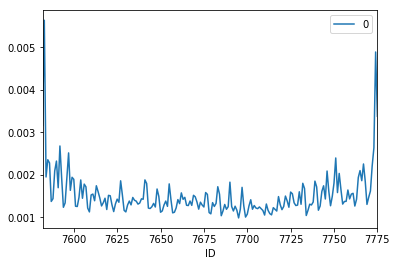

100%|██████████| 22/22 [03:19<00:00,  8.85s/it]

0.999999930934
3.22466870908


In [25]:
# %%time

for t in tqdm(tss, position=0):
    ts = tss[t]
    lenn = len(ts)
    test = 30
    train = lenn - 30
    X = []
    y = []
    for i in range(30, train - 30):
        cur = ts[i-30:i]
        _X, last = get_delta(cur)
        _y = float(ts.iloc[[i+30]]['ACTUAL']) - last
        X.append(_X)
        y.append(_y)
    ind = ts[30:train-30].index
    X = pd.DataFrame(X, index=ind)
    y = pd.DataFrame(y, index=ind)
    X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=False, test_size=0.25)
    evalt = X_val.index
#     print(X_train, X_val)
    model = CatBoostRegressor(loss_function='MAPE', l2_leaf_reg=10)
    model.fit(X_train, y_train)
    y_eval = model.predict(X_val)
    y_train.plot()
    y_val.plot()
    (pd.DataFrame(y_eval, index=y_val.index)).plot()
    plt.show()
    print(qualityMAPE(y_val, y_eval)[0])
#     print(len(evalt), len(y_eval), len(X_val), len(y_val))
#     print(X.loc[evalt][1])
#     print(X.loc[evalt - 30][1] + y_eval[1])
#     print(y_val)
#     print(X.loc[evalt][1].index)
#     print((X.loc[evalt - 30][1] + y_eval[1]))
    print(qualityMAPE(X.loc[evalt][1], X.loc[evalt - 30][1] + y_eval[1])[0])

In [ ]:
x = pd.DataFrame({1:[1,2,3], 3:[5,1,9]})

In [237]:
f1 = pd.DataFrame.from_csv('mixed1')
f2 = pd.DataFrame.from_csv('winter_grid_365')

In [238]:
f1 = f1 * 0.1  + f2 * 0.9

In [240]:
save(f1, 'mixed2')